# **Project for Designing new game**

---

> 다음 분기에 어떤 게임을 설계해야 할까

## **0.데이터 전처리**

  ### **데이터셋 불러오기**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%config InlineBackend.figure_format='retina'

In [2]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [3]:
df = pd.read_csv('vgames2.csv')

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


**Data Description**  
`Name` : 게임의 이름입니다.  
`Platform` : 게임이 지원되는 플랫폼의 이름입니다.  
`Year` : 게임이 출시된 연도입니다.  
`Genre` : 게임의 장르입니다.   
`Publisher` : 게임을 배급하는 회사입니다.  
`NA_Sales` : 북미지역에서의 출고량입니다.  
`EU_Sales` : 유럽지역에서의 출고량입니다.   
`JP_Sales` : 일본지역에서의 출고량입니다.  
`Other_Sales` : 기타지역에서의 출고량입니다.  

### **EDA & Data Wrangling**

In [5]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
# Unnamed: 0	컬럼 삭제
df = df.drop("Unnamed: 0",axis=1)

---

### 결측치 처리

In [7]:
#결측치 확인
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

결측치가 존재하는 칼럼은 'Name'이 동일한 row가 존재하는 경우 그 row의 해당 값으로 결측치를 대치하고자 한다

동일한 Name을 가진 row가 없는 결측치의 경우,  
Year칼럼은 출고량이 1M이상인 데이터만 따로 출시년도를 찾아 입력해주고, 나머지는 삭제한다.  
Genre와 Publisher 칼럼은 각각 Misc와 Unknown으로 대치한다.  

---

In [8]:
# Year 결측치 없는 데이터 yesYear
yesYear = df.copy()
yesYear = yesYear.dropna(subset=['Year'])

# yesYear데이터의 Name컬럼의 고유값 저장
name_Year = yesYear['Name'].unique()

In [9]:
# Year가 결측치 & name_Year에 Name이 존재하는 row의 Year는 yesYear 데이터프레임에서 같은 Name을 가지는 dataframe중 첫번째 row의 Year값을 넣어준다.

for i in range(df.shape[0]):
      if df["Year"].isna()[i] == True  and  df["Name"][i] in name_Year  :
             df.loc[i,["Year"]] = yesYear[yesYear["Name"] == df.Name[i]].iloc[0]["Year"]

In [10]:
#Genre 컬럼에 대해서도 동일하게 결측치를 대체한다

# Genre 존재하는 데이터
yesGenre = df.copy()
yesGenre = yesGenre.dropna(subset=['Genre'])

# yesGenre데이터의 Name컬럼의 고유값 저장
name_Genre = yesGenre['Name'].unique()

for i in range(df.shape[0]):
      if df["Genre"].isna()[i] == True and  df["Name"][i] in name_Genre   :
             df.loc[i,["Genre"]] = yesGenre[yesGenre["Name"] == df.Name[i]].iloc[0]["Genre"]

In [11]:
# 남은 Genre 결측치는 '그 외,기타'를 의미하는 Misc로 대치한다.
df.Genre.fillna("Misc",inplace=True)

---

In [12]:
#Publisher 컬럼에 대해서도 동일하게 결측치를 대체한다.
yesPublisher = df.copy()
yesPublisher = yesPublisher.dropna(subset=['Publisher'])

name_Publisher = yesPublisher['Name'].unique()

for i in range(df.shape[0]):
      if df["Publisher"].isna()[i] == True  and  df["Name"][i] in name_Publisher   :
             df.loc[i,["Publisher"]] = yesPublisher[yesPublisher["Name"] == df.Name[i]].iloc[0]["Publisher"]

In [13]:
# 남은 Publisher 결측치는 Unknown으로 대치한다.
df.Publisher.fillna("Unknown",inplace=True)

In [14]:
# 결측치 확인 #year 컬럼은 추후 진행
df.isna().sum()

Name             0
Platform         0
Year           147
Genre            0
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

---

### 중복값 제거

In [15]:
#데이터 프레임 전체 중복 확인
df.duplicated().sum()

1

In [16]:
# 중복값 제거
df = df.drop_duplicates()

In [17]:
# 같은 년도 같은 플랫폼에 출시된 게임의 중복 확인
df[df.duplicated(subset=["Name","Platform","Year"],keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0,0.22
8651,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0,0.48,0,0
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0,0.01,0,0
15705,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66


In [18]:
# Madden NFL 13의 출고량을 찾아보니 첫주에 1.65M의 판매량을 기록했음을 알 수 있었다. 따라서 두번째 데이터를 제거
# Sonic the Hedgehog은 출고량합이 높은 두번째 데이터를 보존하고, 첫번째 데이터 삭제
df = df.drop(index=[8651,8717])

In [19]:
# 같은 플랫폼에 출시된 같은 이름의 게임 중복 확인
df[df.duplicated(subset=["Name","Platform",],keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.8,0.01,0.15
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,20K,0.23,0,0.05
12529,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1,0.17,0.02,0.1
13808,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0,0.06,0,0.02


Need for Speed: Most Wanted의 경우 같은 회사에서 2005년에 출시한 게임의 속편을 2012년에 똑같은 이름으로 출시했다.  
정상적인 데이터로 판명

---

### 데이터 타입 변경

In [20]:
# 출고량 컬럼들을 살펴본 결과 M이나 K등 숫자가 아닌 데이터가 존재함.
# 아무런 단위가 적혀있지 않은 데이터는 정황상 million단위로 추정되므로 모든 단위를 밀리언 단위로 맞출 예정

#우선 M은 같은 밀리언 단위이므로 M을 바로 지워도 무방하므로 replace 메서드를 사용해서 지워준다
df.NA_Sales = df.NA_Sales.str.replace('M', '')
df.EU_Sales = df.EU_Sales.str.replace('M', '')
df.JP_Sales = df.JP_Sales.str.replace('M', '')
df.Other_Sales = df.Other_Sales.str.replace('M', '')

In [21]:
# 칼럼마다 K가 들어가있는 row의 인덱스를 변수에 저장해 둔 후, 추후 데이터타입을 바꾼후에 1000으로 나눠줄 것이다
NA_K = df[df.NA_Sales.str.contains("K")].index
EU_K = df[df.EU_Sales.str.contains("K")].index
JP_K = df[df.JP_Sales.str.contains("K")].index
Other_K = df[df.Other_Sales.str.contains("K")].index

In [22]:
#replace 메서드를 사용해서 K를 지워준다
df.NA_Sales = df.NA_Sales.str.replace('K', '')
df.EU_Sales = df.EU_Sales.str.replace('K', '')
df.JP_Sales = df.JP_Sales.str.replace('K', '')
df.Other_Sales = df.Other_Sales.str.replace('K', '')

In [23]:
# M과 K이외의 알파벳이 들어간 행이 있는지 확인한다.
df[df.NA_Sales.str.contains("[a-zA-Z]")|df.EU_Sales.str.contains("[a-zA-Z]")|df.JP_Sales.str.contains("[a-zA-Z]")|df.Other_Sales.str.contains("[a-zA-Z]")]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [24]:
#출고량 칼럼들의 데이터 타입을 실수형으로 변경
df = df.astype({'NA_Sales': 'float', 'EU_Sales': 'float','JP_Sales': 'float','Other_Sales': 'float'})

In [25]:
# K가 들어가있던 칼럼을 각각 1000씩 나눠줌
for i in range(df.shape[0]):
      if i in NA_K :
             df.loc[i,["NA_Sales"]] /= 1000
      if i in EU_K :
             df.loc[i,["EU_Sales"]] /= 1000
      if i in JP_K :
             df.loc[i,["JP_Sales"]] /= 1000
      if i in Other_K :
             df.loc[i,["Other_Sales"]] /= 1000

In [26]:
df.loc[NA_K] #K가 있던 row의 NA_Sales값이 제대로 적용 되었는지 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33,0.00,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0.00,0.02,0.00,0.00
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0.00,0.00,0.04,0.00
1086,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0.00,0.00,0.19,0.00
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0.00,0.01,0.00,0.00
16194,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,0.12,0.15,0.00,0.06
16330,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,0.72,0.56,0.00,0.19
16492,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0.00,0.12


In [27]:
#Total_sales 칼럼 추가
df["Total_sales"] = df.loc[:,["NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales"]].sum(axis=1)

---

In [28]:
#Year 결측치 중 Total_sales가 1.0M보다 큰 데이터들
df[df.Year.isna()].query("Total_sales > 1.0")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
3031,Donkey Kong Land III,GB,NaN,Platform,Nintendo,0.68,0.31,0.0,0.04,1.03
3562,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,Unknown,1.57,1.02,0.0,0.41,3.00
3942,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,0.58,0.40,0.0,0.07,1.05
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.0,0.20,2.11
5720,Adventure,2600,NaN,Adventure,Atari,1.21,0.08,0.0,0.01,1.30
10776,Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0.0,0.22,1.62
11309,Triple Play 99,PS,NaN,Sports,Unknown,0.81,0.55,0.0,0.10,1.46
12858,Rock Band,PS2,NaN,Misc,Electronic Arts,0.71,0.06,0.0,0.35,1.12
13327,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.40


In [29]:
#결측치를 따로 찾아서 넣어준다
df.loc[31,["Year"]] = 2007
df.loc[3031,["Year"]] = 1997
df.loc[3562,["Year"]] = 2005
df.loc[3942,["Year"]] = 1999
df.loc[4181,["Year"]] = 2007
df.loc[5720,["Year"]] = 1980
df.loc[10776,["Year"]] = 2007
df.loc[11309,["Year"]] = 1998
df.loc[12858,["Year"]] = 2007
df.loc[13327,["Year"]] = 2001
df.loc[14765,["Year"]] = 1977

In [30]:
# 나머지 결측치 행을 drop 합니다.
df = df.dropna()
# Year컬럼의 데이터타입 변경
df = df.astype({'Year':'int'})
# index를 리셋해줍니다.
df.reset_index(drop=True, inplace=True)

### 이상치 처리

In [31]:
df.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12, 1977,   94])

In [32]:
#Year값에 4자리 년도가 아닌 숫자들이 많다. 70~90년대는 1900더해주고, 나머지 20보다 작은 숫자들은 2000을 더해서 4자리 년도로 바꿔준다.
for i in range(df.shape[0]):
    if df["Year"][i] < 20  :
            df.loc[i,["Year"]] += 2000
    if df["Year"][i] > 70 and df["Year"][i] < 100 :
            df.loc[i,["Year"]] += 1900

In [33]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
count,16460.000000,16460.000000,16460.000000,16460.000000,16460.000000,16460.000000
mean,2006.406197,0.266022,0.147574,0.078142,0.048375,0.540112
std,5.824009,0.819871,0.507323,0.310428,0.189338,1.561211
min,1977.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [34]:
#출고량 데이터에 이상치가 있는지 확인
#전체 출고량으로 내림차순 정렬
df.sort_values(by=["Total_sales"], axis=0, ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
2890,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4170,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12480,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3328,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7774,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
12368,Hirameki Action: Chibikko Wagyan no Daiki na B...,DS,2009,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
12362,Legoland,PC,1999,Action,LEGO Media,0.00,0.01,0.00,0.00,0.01
4540,Shirogane no Soleil: Contract to the Future - ...,PS2,2008,Adventure,Russel,0.00,0.00,0.01,0.00,0.01
13630,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Wii Sports와 Super Mario Bros.의 판매량을 찾아본 결과 실제판매량과 일치하므로 정상적인 데이터로 판명

In [35]:
#Genre컬럼과 Platform컬럼의 unique값을 확인하여 이상치가 있는지 본다
print(df.Genre.unique())
print(df.Platform.unique())

['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']
['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


---

In [36]:
#추후에 연도별 트랜드를 파악하기위해 연도별 데이터 갯수를 확인하고 너무 적은 데이터는 drop해 준다. 
df.groupby(by=['Year'],as_index=False).count()[["Year","Name"]]

,Year,Name
0,1977,1
1,1980,10
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


In [37]:
#데이터개수가 10개 미만인 년도들을 삭제하자
df_2 = df[(df.Year <= 2016) & (df.Year >= 1980)]

In [38]:
df_2.reset_index(drop=True, inplace=True)

In [39]:
df_clean = df_2.copy()

In [121]:
df_clean.shape

(16455, 10)

## **1. 지역에 따라서 선호하는 게임 장르가 다를까?**

### **가설 검정**

지역에 따라서 장르별 출고량 비율이 같을까?  
$H_0$: 지역에 따라 장르별 출고량 비율이 동일하다.  
$H_a$: 지역에 따라 장르별 출고량 비율이 차이가 있다.

In [115]:
# 장르별 지역별 출고량 데이터프레임
df_genre = df_clean.groupby(by=['Genre'],as_index=False).sum().drop(["Year","Total_sales"],axis=1)
df_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,870.59,522.30,156.61,186.43
1,Adventure,105.28,64.01,51.94,16.78
2,Fighting,223.00,101.20,87.15,36.65
3,Misc,421.98,222.54,118.02,78.71
4,Platform,446.15,200.97,130.53,51.50
5,Puzzle,122.17,50.53,56.24,12.49
6,Racing,357.28,236.83,56.33,76.93
7,Role-Playing,318.84,183.16,343.38,56.79
8,Shooter,580.71,312.89,38.20,102.59
9,Simulation,181.61,113.23,63.54,31.35


In [116]:
from scipy.stats import chi2_contingency
# 가설검증을 위해 이원 카이제곱 검정 검정 진행
df_Test = df_genre.set_index("Genre")
chi2_val, p, dof, expected = chi2_contingency(df_Test)
p

3.829499106260968e-124

p 값이 $3.83\times10^{-124}$로 0.05보다 작으므로 귀무가설을 기각할 수 있다.  
즉 지역에 따라 장르별 출고량 비율에 차이가 있다.  
지역마다 선호하는 장르가 다르다고 할 수 있다.

### **시각화**

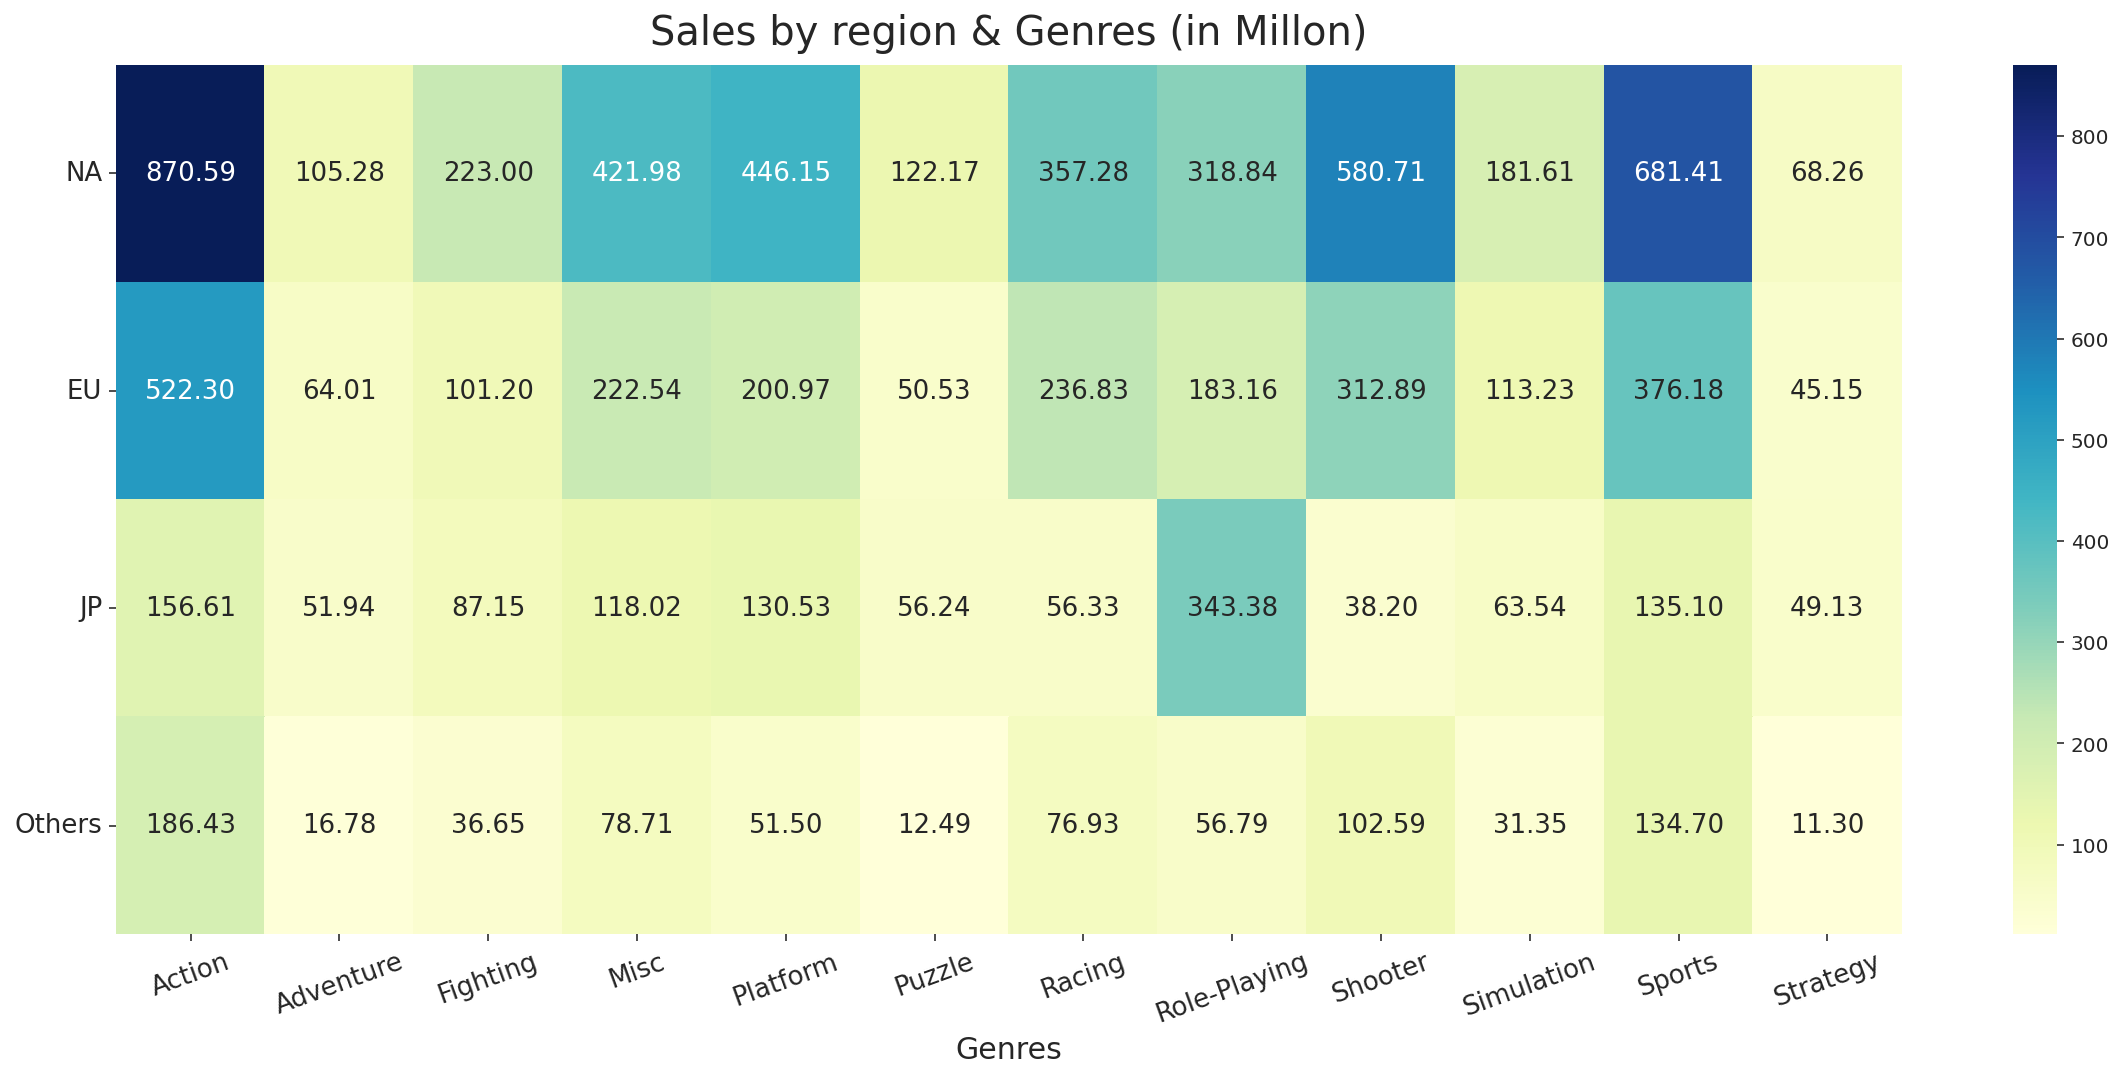

In [42]:
# 지역별 선호 게임장르 히트맵으로 시각화
plt.figure(figsize=(20, 8))
sns.set_style("ticks")
sns.heatmap(df_Test.T, annot=True, fmt='.2f' , annot_kws={"fontsize":13} ,cmap="YlGnBu")
plt.xlabel("Genres",fontsize=15)
plt.title("Sales by Region & Genres (in Millon)",fontsize=20, pad=10)
plt.xticks(rotation = 20, fontsize=13)
plt.yticks( np.arange(4)+0.5, ["NA","EU","JP","Others"],rotation = 0, fontsize=13)
plt.show()

일본 유저들은 Role-plyaing를 선호한다.  
북미와 유럽, 그외 지역 유저들은 Action, Sports, Shooter 장르를 선호한다.

## **2. 연도별 게임의 트렌드가 있을까**

### 장르별 트렌드

연도에 따른 장르별 타이틀 빈도수를 카이제곱 검정

연도에 따라서 유행하는 게임 장르가 다를까  
$H_0$ : 연도별 장르 비율이 동일하다.  
$H_a$ : 연도별 장르 비율이 차이가 있다.  

In [133]:
# 테스트를 위한 Year와 Genre의 빈도수 crosstab 생성
ctab = pd.crosstab(df_clean.Year,df_clean.Genre)
ctab

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1,1,1,4,0,0,0,0,2,0,1,0
1981,25,0,0,0,3,2,1,0,10,1,4,0
1982,18,0,0,1,5,3,2,0,5,0,2,0
1983,7,1,0,1,5,1,0,0,1,0,1,0
1984,1,0,0,1,1,3,3,0,3,0,2,0
1985,2,0,1,0,4,4,0,0,1,1,1,0
1986,6,0,0,0,6,0,1,1,4,0,3,0
1987,2,1,2,0,2,0,0,3,2,0,4,0
1988,2,0,0,0,4,1,1,3,1,1,2,0


In [118]:
# 연도와 장르가 관련이 있는지 카이제곱 검정으로 확인한다.
chi2_val, p, dof, expected = chi2_contingency(ctab)
p

0.0

P값이 0이므로 귀무가설을 기각할 수 있다. 따라서 연도에 따른 장르별 타이틀 빈도수 비율이 차이가 있다.

---

연도에 따른 장르별 타이틀 출고량에 카이제곱 검정

연도에 따라서 장르별 출고량의 비율이 다를까  
$H_0$ : 연도에따라서 장르별 출고량 비율이 동일하다.  
$H_a$ : 연도에따라서 장르별 출고량 비율이 차이가 있다.  

In [69]:
#연도와 장르 컬럼으로 그룹바이 데이터 생성
df_Year = df_clean.groupby(by=['Year',"Genre"],as_index=False).sum()[["Year","Genre","Total_sales"]]
df_Year

,Year,Genre,Total_sales
0,1980,Action,0.34
1,1980,Adventure,1.30
2,1980,Fighting,0.77
3,1980,Misc,2.70
4,1980,Shooter,7.07
...,...,...,...
382,2016,Role-Playing,6.75
383,2016,Shooter,18.17
384,2016,Simulation,0.39
385,2016,Sports,14.63


In [135]:
#pivot 메소드를 통해 연도에 따른 장르별 출고량 데이터 추가
df_Year_Test =  df_Year.pivot(index='Year',columns='Genre',values='Total_sales').fillna(0.0)
df_Year_Test

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,1.30,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.50,0.00
1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00
1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00
1985,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.00
1986,13.74,0.00,0.00,0.00,9.39,0.00,1.96,2.52,3.89,0.00,5.58,0.00
1987,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.00
1988,1.74,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.00


In [136]:
# 연도와 장르가 관련이 있는지 카이제곱 검정으로 확인한다.
chi2_val, p, dof, expected = chi2_contingency(df_Year_Test)
p

0.0

P값이 0이므로 귀무가설을 기각할 수 있다. 따라서 연도에 따른 장르별 출고량 비율이 차이가 있다.

### 시각화

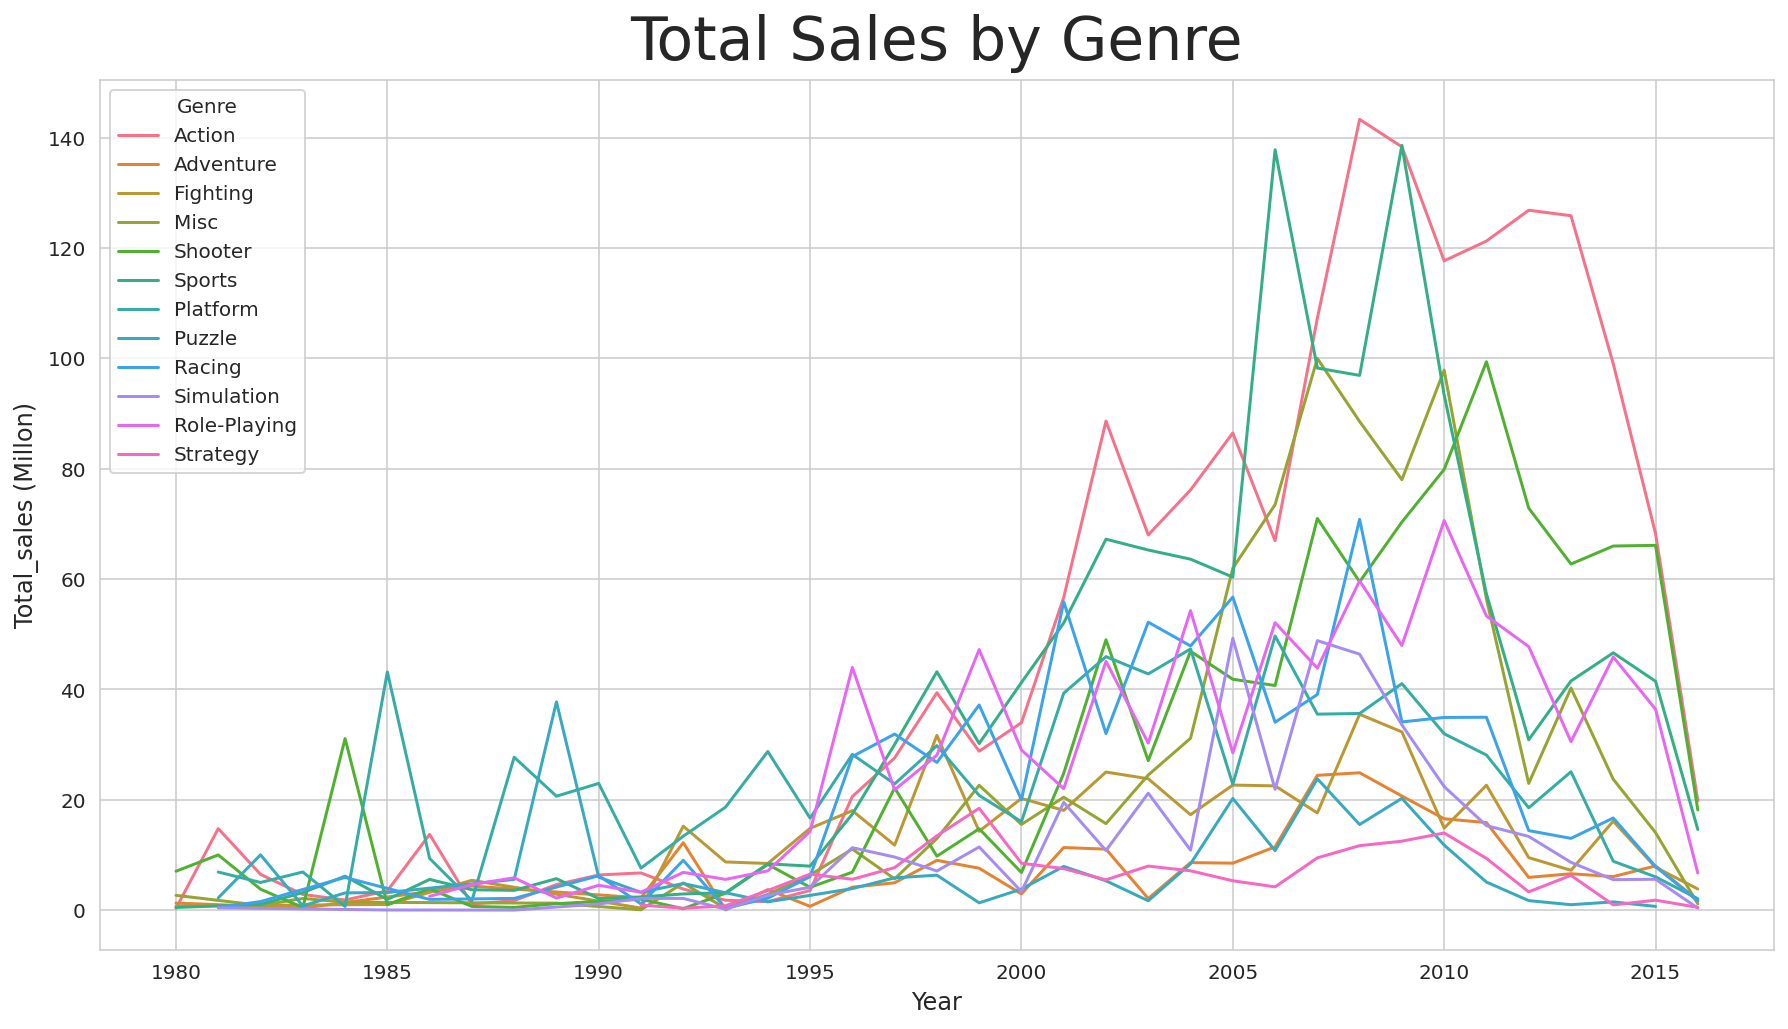

In [85]:
#장르에 따른 연도별 판매량 라인플롯
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
plt.ylabel("Total_sales (Millon)",fontsize=12)
plt.xlabel("Year",fontsize=12)
sns.lineplot(x='Year', y='Total_sales', hue="Genre", data=df_Year) 
plt.title("Total Sales by Genre",fontsize=30, pad=10)
plt.show();

In [ ]:
#연도별 최대 유행 장르 테이블
year_best = df_Year.groupby(['Year'])['Total_sales'].transform(max) == df_Year['Total_sales']
df_year_best = df_Year[year_best].reset_index(drop=True).drop("Total_sales",axis=1)
df_year_best

,Year,Genre
0,1980,Shooter
1,1981,Action
2,1982,Puzzle
3,1983,Platform
4,1984,Shooter
5,1985,Platform
6,1986,Action
7,1987,Fighting
8,1988,Platform
9,1989,Puzzle


연도별로 게임 장르에 따른 트렌드가 존재함을 확인 할 수 있다.

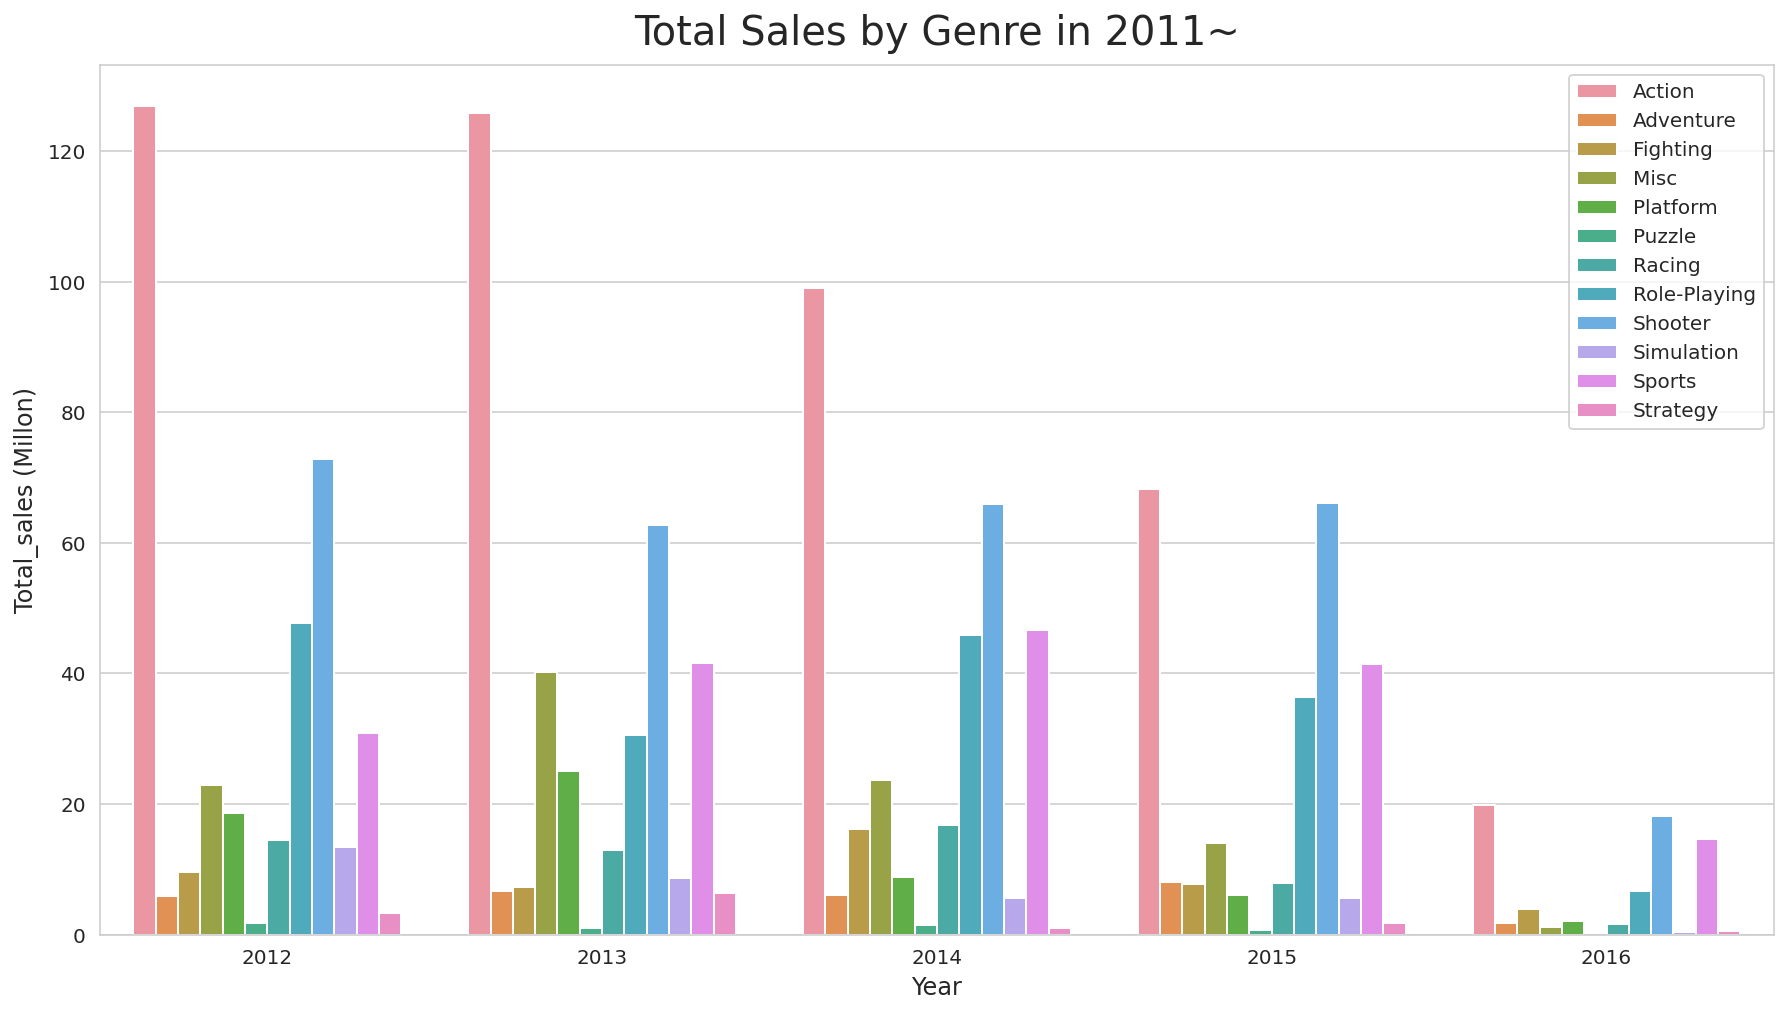

In [124]:
#2011년부터 끊어서 보자
df_Year_5 = df_Year[df_Year.Year>=2012]
sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='Total_sales', hue="Genre", data=df_Year_5) 
plt.ylabel("Total_sales (Millon)",fontsize=12)
plt.xlabel("Year",fontsize=12)
plt.title("Total Sales by Genre in 2011~",fontsize=20, pad=10)
plt.legend(loc='upper right')
plt.show();

최근의 게임 장르의 트렌드는 Action, Shooter, Sports 장르가 우세하다

## **3. 년도에 따른 게임 플랫폼의 변화**


In [86]:
df_Platform = df_clean.groupby(by=['Year',"Platform"],as_index=False).sum()[["Year","Platform","Total_sales"]]
df_Platform

,Year,Platform,Total_sales
0,1980,2600,12.68
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96
...,...,...,...
238,2016,PS4,39.30
239,2016,PSV,3.38
240,2016,WiiU,3.28
241,2016,X360,0.83


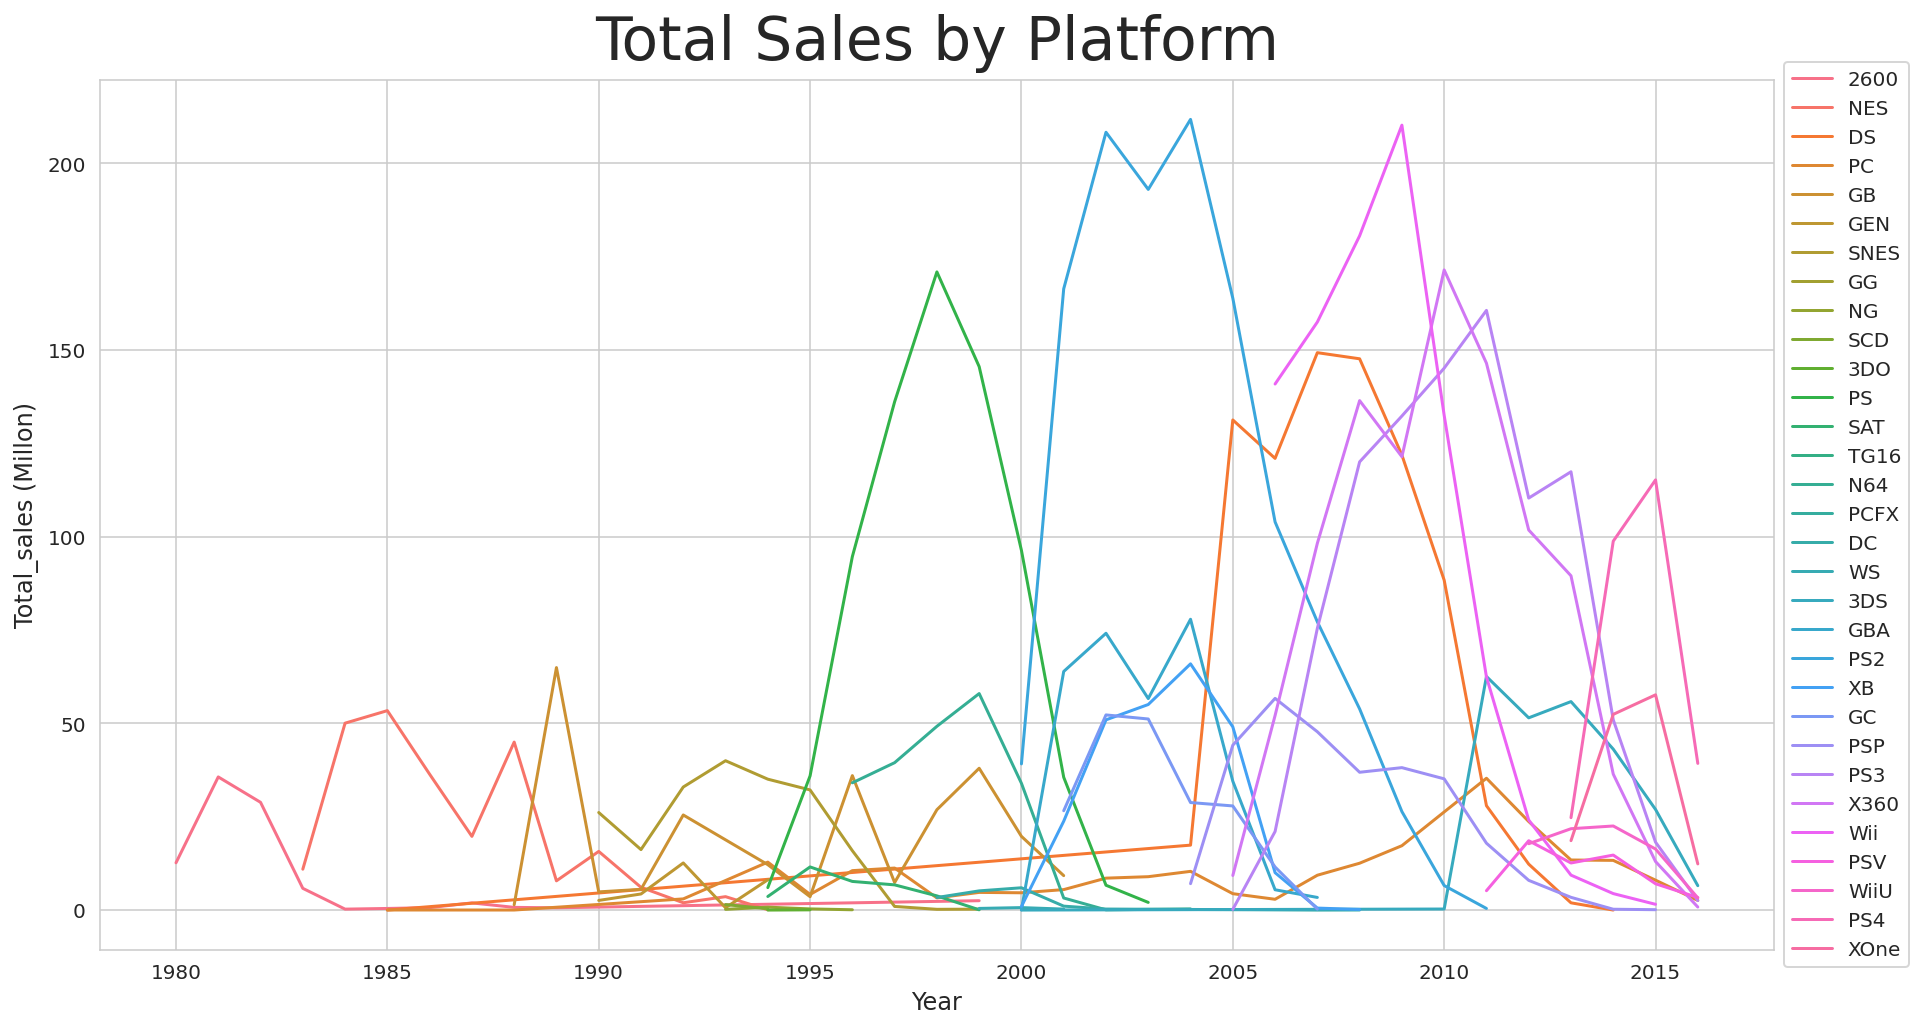

In [126]:
#플랫폼에 따른 연도별 판매량
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
plt.ylabel("Total_sales (Millon)",fontsize=12)
plt.xlabel("Year",fontsize=12)
sns.lineplot(x='Year', y='Total_sales', hue="Platform", data=df_Platform) 
plt.title("Total Sales by Platform",fontsize=30, pad=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

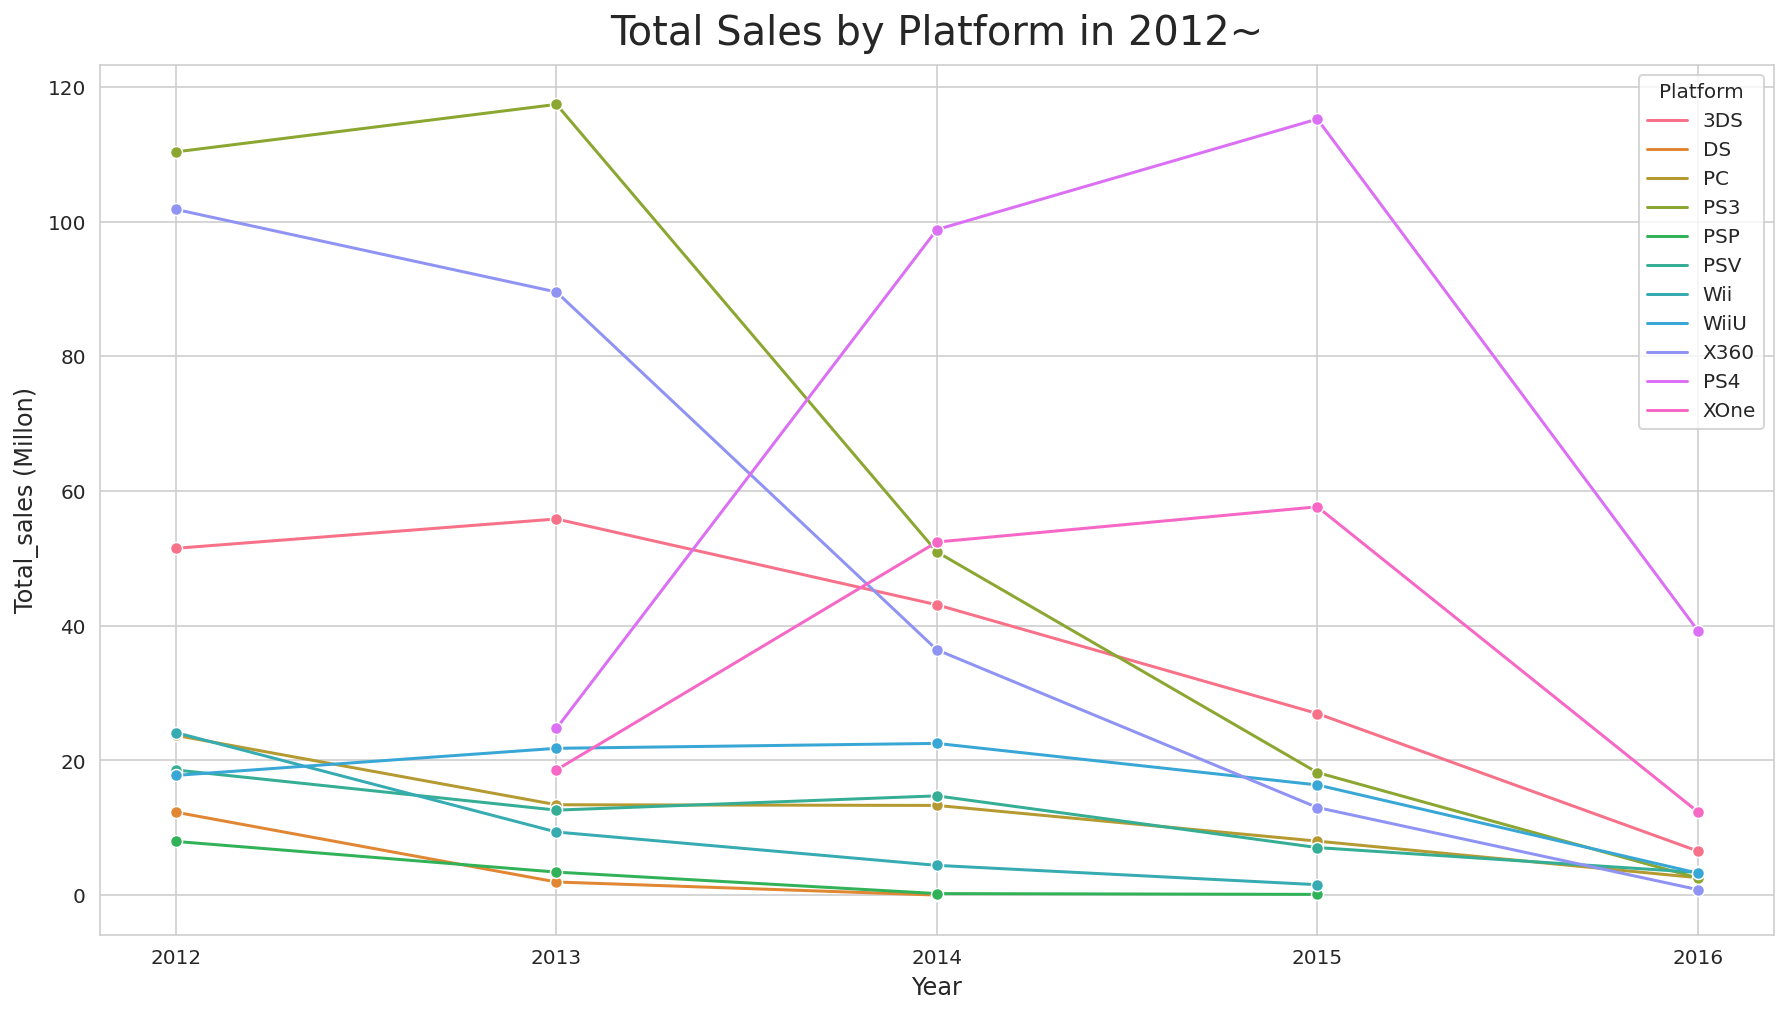

In [129]:
#2012년~ 이후의 플랫폼 현황
df_Platform_5 = df_Platform[df_Platform.Year>=2012]
sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Total_sales', hue="Platform", data=df_Platform_5, marker='o') 
plt.ylabel("Total_sales (Millon)",fontsize=12)
plt.xlabel("Year",fontsize=12)
plt.title("Total Sales by Platform in 2012~",fontsize=20, pad=10)
plt.xticks([2012,2013,2014,2015,2016])
plt.show();

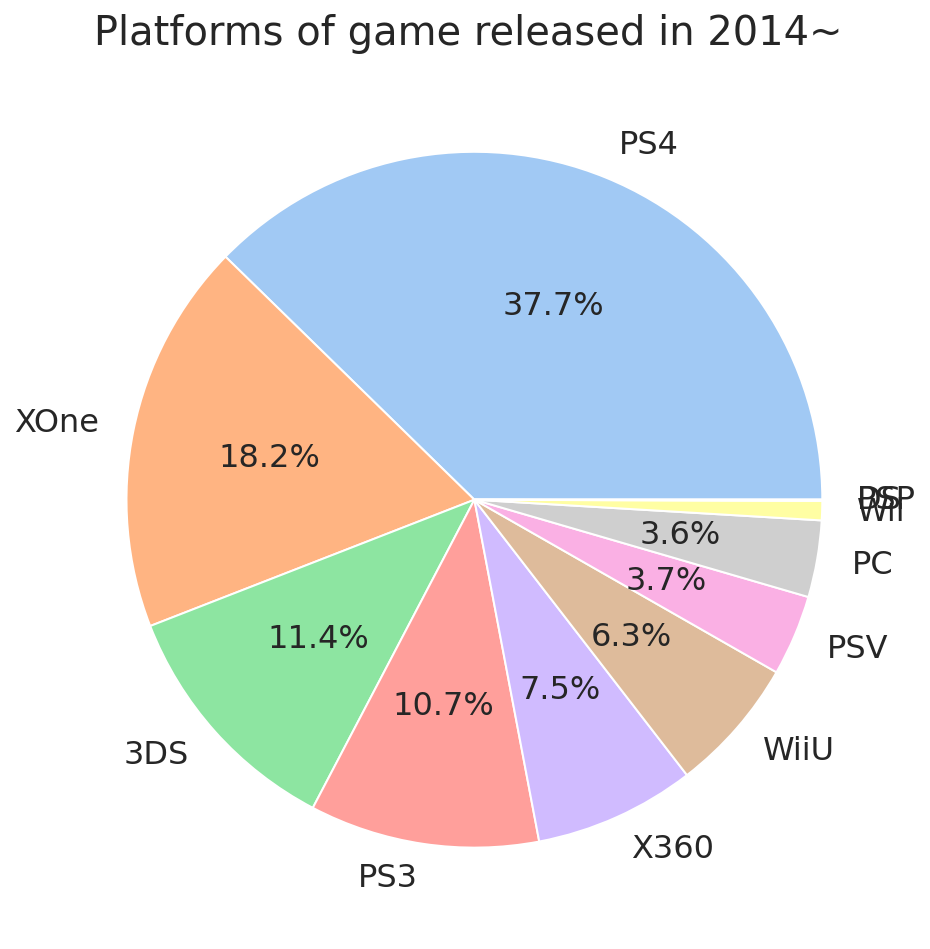

In [112]:
# 2013년 하반기에 PS4와 X Box One이 출시도었으므로 신기종의 시장 점유율을 확인하고자 2014년도 부터의 데이터를 추출
# 2014~2016년의 플랫폼 별 게임 출고량 비교
df_Plat_recent = df_Platform[df_Platform.Year>=2014]
df_Plat_recent = df_Plat_recent.groupby(by=['Platform'],as_index=False)["Total_sales"].sum().sort_values(by='Total_sales',ascending=False).reset_index(drop=True)

labels = df_Plat_recent['Platform']

#일정 퍼센티지 이상만 표시하는 함수
def customPct(pct) :
    return ('%.1f%%' % pct) if pct >= 3 else ''

plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')
plt.pie(df_Plat_recent["Total_sales"],labels=labels, colors = colors, autopct = customPct,textprops={'fontsize': 16})
plt.title("Platforms of Game released in 2014~ ",fontsize=20, pad=10)

plt.show()

PS4와 XboxONE이 출시된 후 절반 이상의 게임들이 해당 플랫폼으로 출시되어 많은 출고량을 올렸습니다. 따라서 PS4와 XboxONE 개발환경을 기준으로 게임을 설계하는 것이 합당하다.

### **4 : PS4 & Xbox One 게임 시장 동향**

### PS4 & XOne로 출시된 게임들의 지역별 출고량 비율

In [104]:
#PS4 & XOne 데이터를 취합
df_5 = df_clean[ (df_clean["Platform"] == "PS4") | (df_clean["Platform"] == "XOne") ]

In [105]:
#PS4 & XOne 게임들의 지역별 게임 출고량을 파이차트로 그리기
df_region = df_5.groupby(by="Year",as_index=False).sum()
region_sale = df_region.sum()[1:5]
region_sale

NA_Sales       179.99
EU_Sales       169.35
JP_Sales        14.61
Other_Sales     55.28
dtype: float64

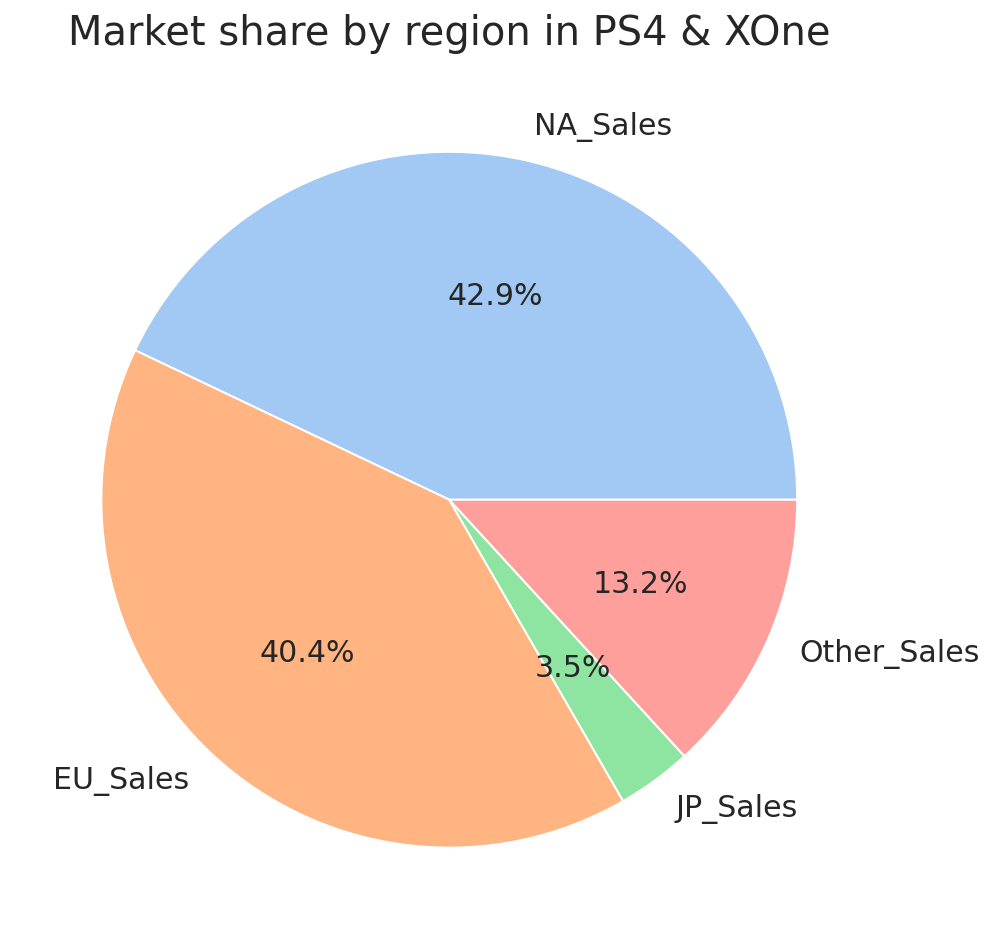

In [107]:
labels = region_sale.index

plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')
plt.pie(region_sale,labels=labels, colors = colors, autopct = customPct,textprops={'fontsize': 15})
plt.title("Market share by Region in PS4 & XOne",fontsize=20, pad=10)

plt.show()

### PS4 & XOne로 출시된 게임들의 장르 선호도 (전 지역)

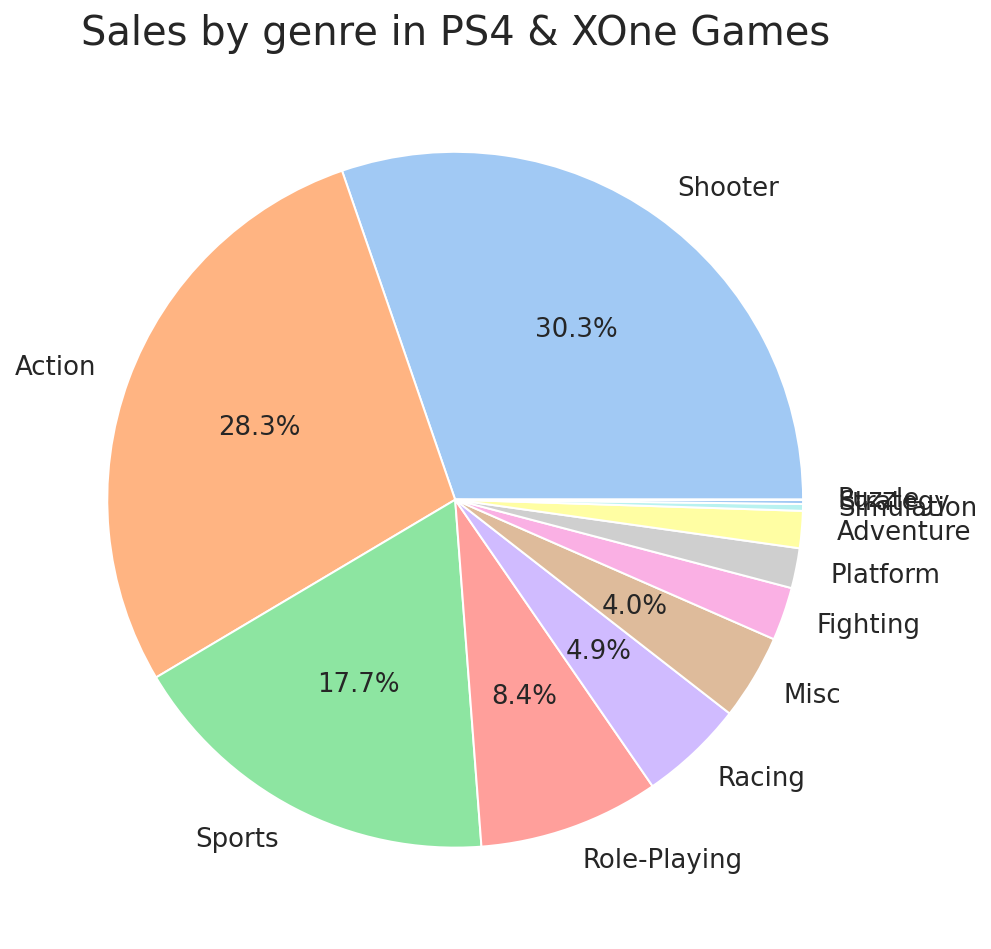

In [110]:
# S4 & XOne로 출시된 게임들의 장르 선호도 파악
PX_Genre = df_5.groupby(by=['Genre'],as_index=False)["Total_sales"].sum().sort_values(by='Total_sales',ascending=False).reset_index(drop=True)

labels = PX_Genre['Genre']

#일정 퍼센티지 이상만 표시하는 함수
def customPct(pct) :
    return ('%.1f%%' % pct) if pct >= 3 else ''

plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')
plt.pie(PX_Genre["Total_sales"],labels=labels, colors = colors, autopct=customPct,textprops={'fontsize': 13})
plt.title("Sales by Genre in PS4 & XOne Games",fontsize=20, pad=10)

plt.show()

### PS4 & XOne로 출시된 게임들의 지역별 장르 선호도

PS4 & XOne 로 출시된 게임들은 지역에 따라서 장르별 출고량의 비율이 다를까?  
$H_0$: 지역별 장르별 출고량 비율이 같다.  
$H_a$: 지역별 장르별 출고량 비율이 다르다.

In [94]:
#PS4 & XOne 지역별 판매량 그룹바이 데이터
df_genre_5 = df_5.groupby(by=['Genre'],as_index=False).sum()
df_genre_5.drop(["Year"],axis=1,inplace=True)

# 가설검증을 위해 카이제곱 독립성 검정 검정 진행
df_Test_5 = df_genre_5.set_index("Genre").drop("Total_sales",axis=1)
chi2_val, p, dof, expected = chi2_contingency(df_Test_5)
p

0.9999344836407044

P값이 0.05보다 높으므로 귀무가설을 기각할 수 없다.
지역별 장르별 출고량 비율이 다르다고 할 수 없다.

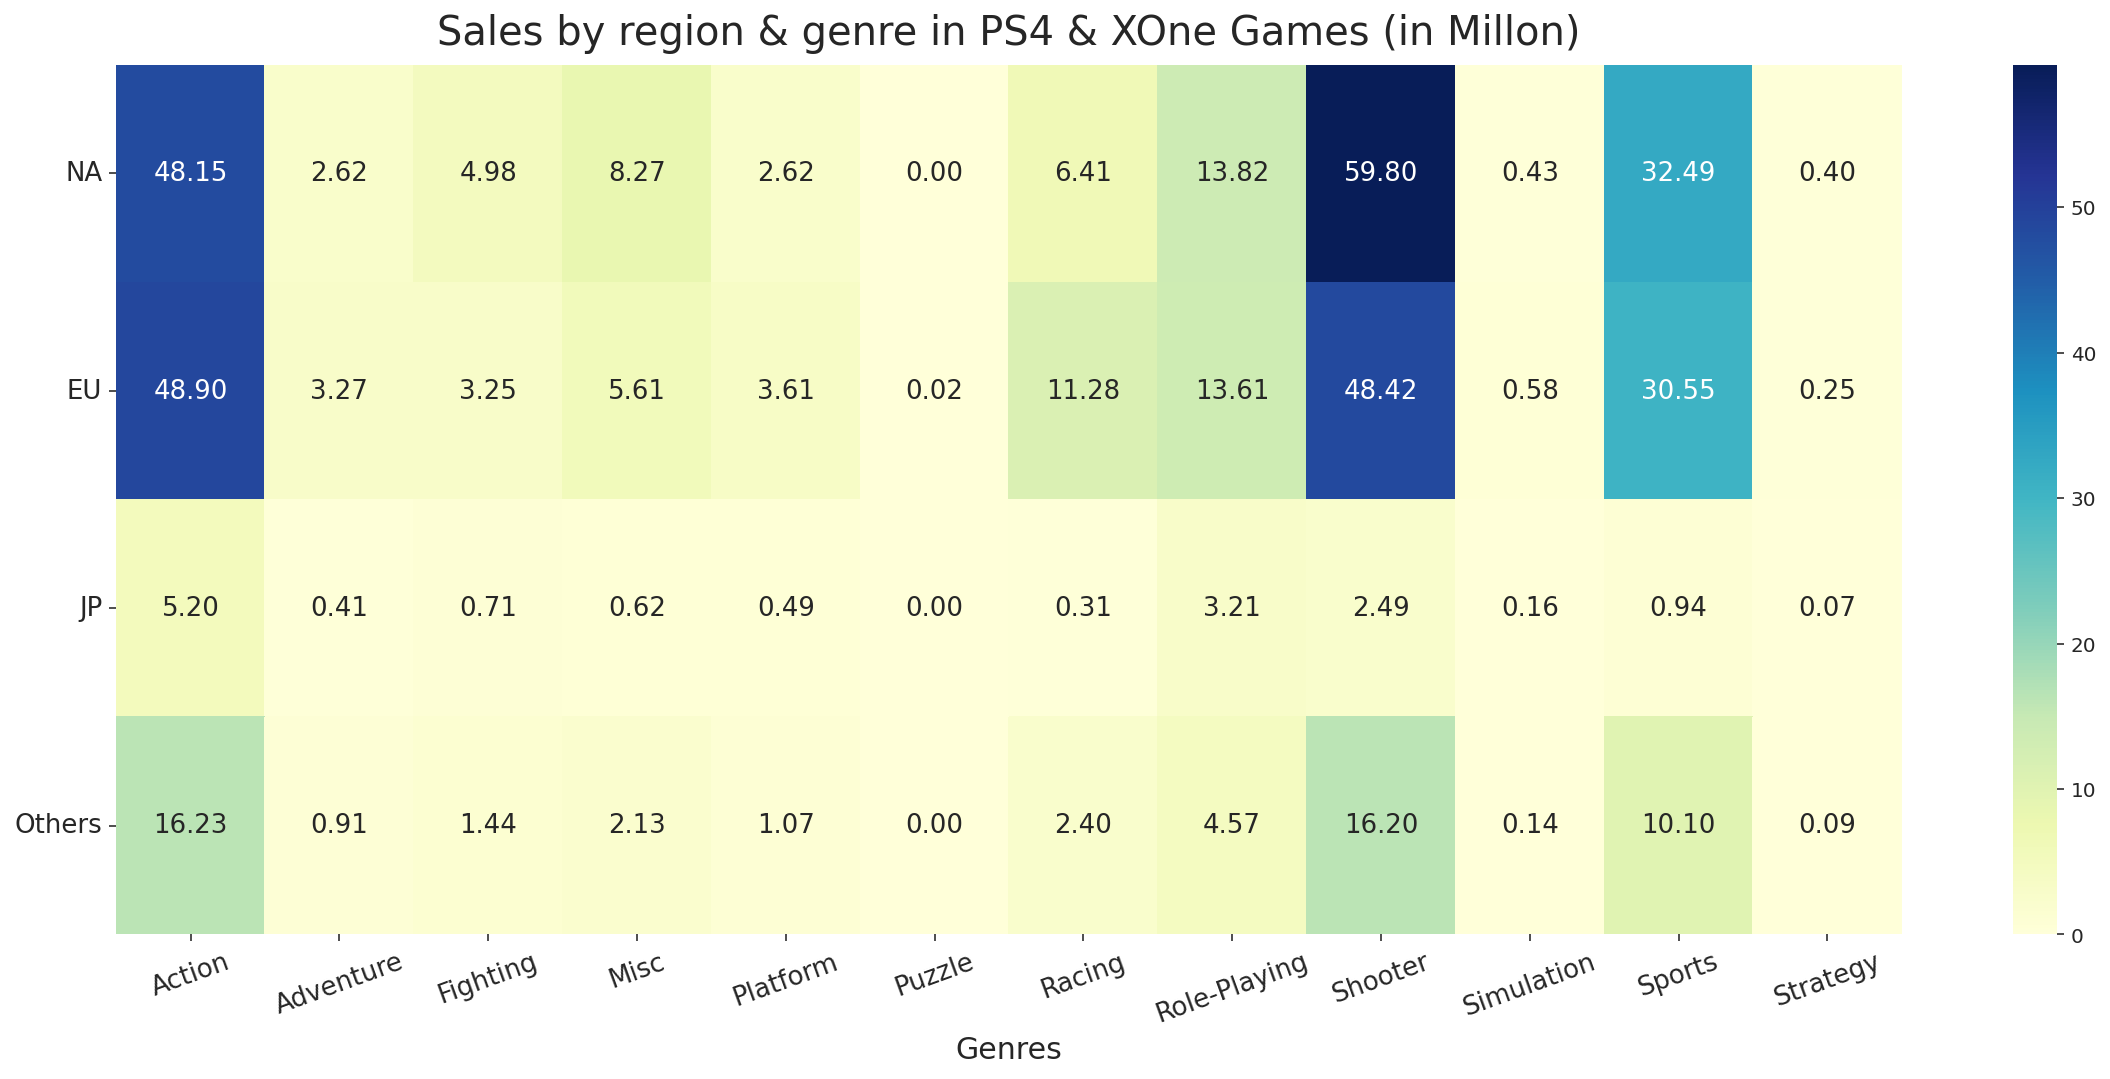

In [108]:
#PS4 & XOne 지역별 선호 게임장르 히트맵으로 시각화
plt.figure(figsize=(20, 8))
sns.set_style("ticks")
sns.heatmap(df_Test_5.T, annot=True, fmt='.2f' , annot_kws={"fontsize":13} ,cmap="YlGnBu")
plt.xlabel("Genres",fontsize=15)
plt.title("Sales by Region & Genre in PS4 & XOne Games (in Millon)",fontsize=20, pad=10)
plt.xticks(rotation = 20, fontsize=13)
plt.yticks( np.arange(4)+0.5, ["NA","EU","JP","Others"],rotation = 0, fontsize=13)
plt.show()

일본 유저들은 Action, Role-plyaing ,Shooter 를 선호한다.  
유럽을 포함한 다른 지역 유저들은 Action, Shooter, Sports 장르를 선호한다.  
북미지역은 Shooter, Action, Sports 순으로 장르 선호도를 보인다.


## **5. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [98]:
#PS4 & XOne 플랫폼의 출고량이 가장 높은 게임 20타이틀의 데이터베이스
bestseller = df_5.sort_values(by='Total_sales',ascending=False)
bestseller = bestseller.head(20).reset_index(drop=True)
bestseller

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
2,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
3,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.61
5,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.29
6,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
7,FIFA 15,PS4,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.60
8,Destiny,PS4,2014,Shooter,Activision,2.49,2.05,0.16,0.96,5.66
9,Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,3.21,1.53,0.01,0.38,5.13


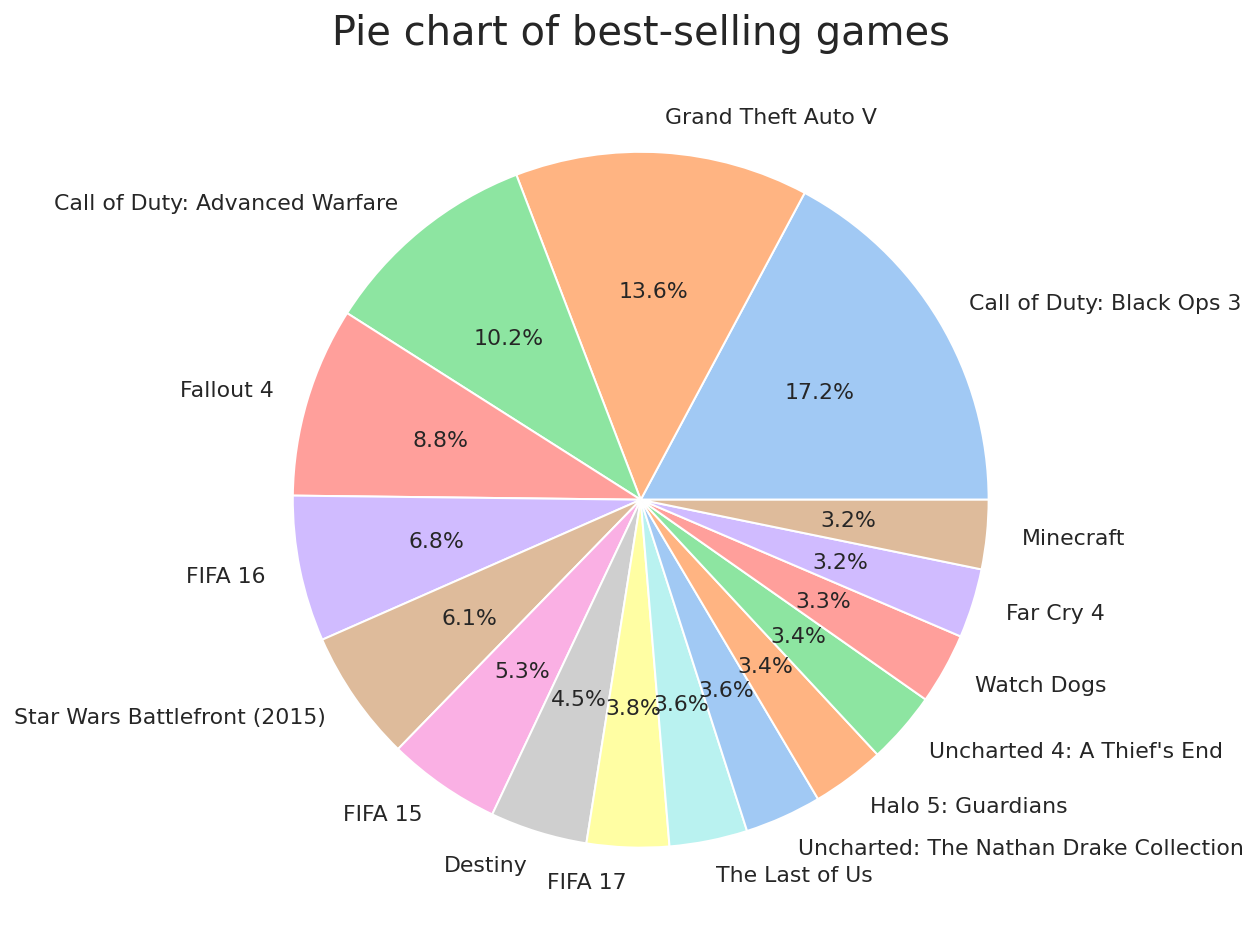

In [99]:
#게임 타이틀 별로 파이차트 그리기
best_title = bestseller.groupby(by=['Name'],as_index=False)["Total_sales"].sum().sort_values(by='Total_sales',ascending=False).reset_index(drop=True)

labels = best_title['Name']

plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')
plt.pie(best_title["Total_sales"],labels=labels, colors = colors, autopct='%1.1f%%',textprops={'fontsize': 11})
plt.title("Pie chart of best-selling games",fontsize=20, pad=10)

plt.show()

In [100]:
best_title 

,Name,Total_sales
0,Call of Duty: Black Ops 3,21.53
1,Grand Theft Auto V,17.07
2,Call of Duty: Advanced Warfare,12.74
3,Fallout 4,11.05
4,FIFA 16,8.49
5,Star Wars Battlefront (2015),7.67
6,FIFA 15,6.60
7,Destiny,5.66
8,FIFA 17,4.78
9,The Last of Us,4.54


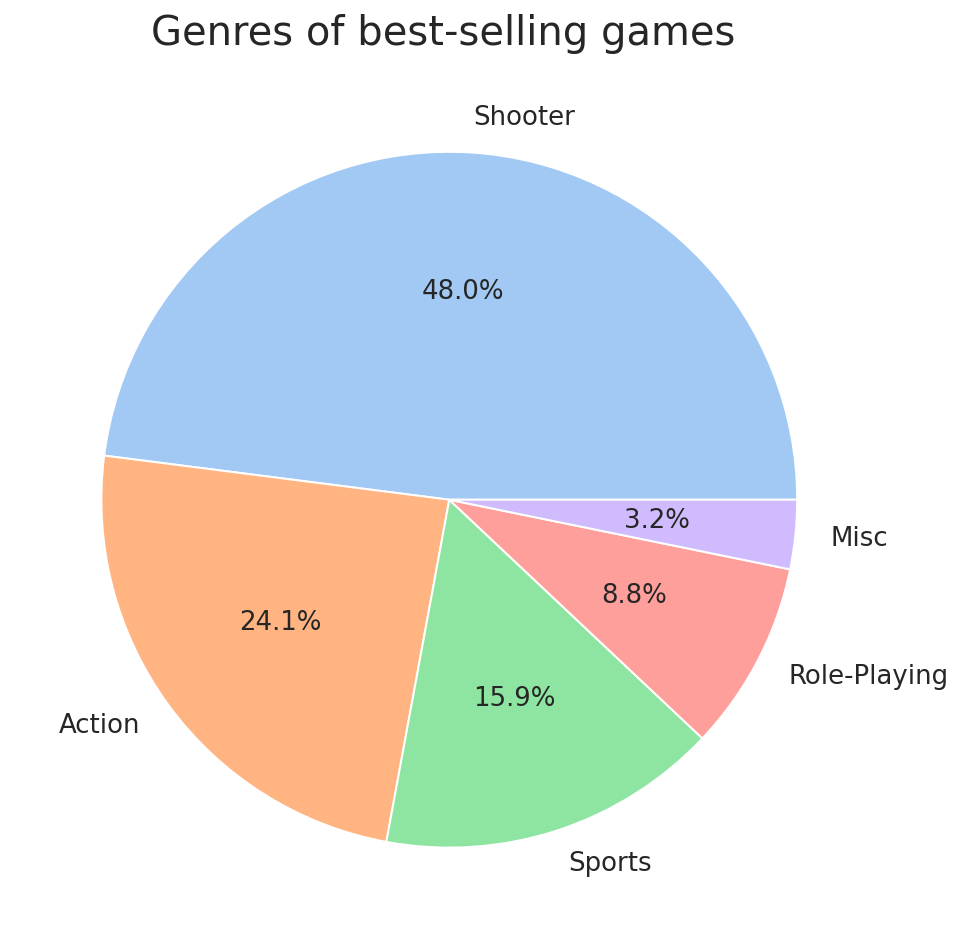

In [101]:
# 출고량 20위 게임들의 장르 파악
best_title_Genre = bestseller.groupby(by=['Genre'],as_index=False)["Total_sales"].sum().sort_values(by='Total_sales',ascending=False).reset_index(drop=True)

labels = best_title_Genre['Genre']

plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')
plt.pie(best_title_Genre["Total_sales"],labels=labels, colors = colors, autopct='%1.1f%%',textprops={'fontsize': 13})
plt.title("Genres of best-selling games ",fontsize=20, pad=10)

plt.show()

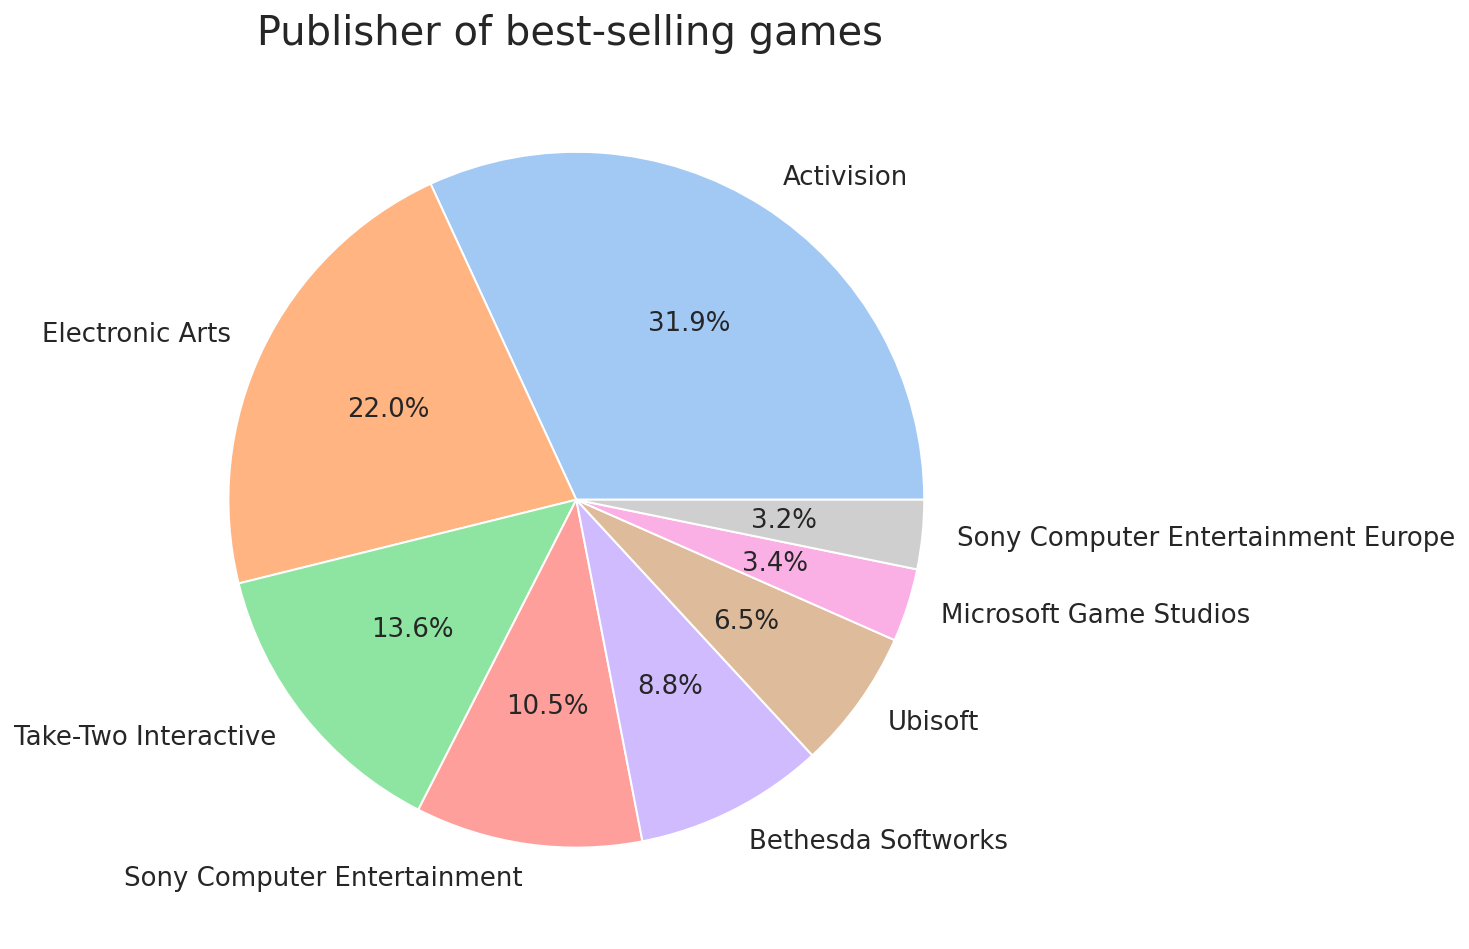

In [119]:
# 출고량 20위 게임들의 퍼블리셔 파악
best_title_Publisher = bestseller.groupby(by=['Publisher'],as_index=False)["Total_sales"].sum().sort_values(by='Total_sales',ascending=False).reset_index(drop=True)

labels = best_title_Publisher['Publisher']

plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')
plt.pie(best_title_Publisher["Total_sales"],labels=labels, colors = colors, autopct='%1.1f%%',textprops={'fontsize': 13})
plt.title("Publisher of best-selling games ",fontsize=20, pad=10)

plt.show()

---

# 결론

  
+  개발 플랫폼은 PS4와 XboxONE 멀티 플랫폼으로 동시에 개발하는 것을 추천합니다.
+  다만 독점계약을 맺거나, 개발 여건상 두 플랫폼중 하나를 우선해야 한다면 시장점유율이 높은 PS4로 출시를 하는것이 더 많은 판매량을 기대할 수 있습니다.
+ 시장규모가 큰 북미와 유럽을 타겟으로 합니다.. 현재 북미와 유럽 게임유저들의 장르 선호도가 거의 일치하기에 두 시장을 동시에 노리는 전략이 유효하다고 생각합니다.
+ PS4와 XboxONE에서 강세를 보이고 있는 Shooter를 메인장르로 개발합니다. 전세계 유저들에게 선호도가 높은 Action장르의 요소도 적절하게 융합한다면 더 많은 타겟을 노릴 수 있을것으로 예상 됩니다.  
+ Activision이나 Electronic Arts와 같은 대형 퍼블리셔와 협업 계약을 맺을 수 있다면 판매량 증진과 더불어, 개발사는 게임 개발에만 더 집중 할 수 있어 게임 퀄리티 향상도 기대할 수 있습니다.